# STA130 Homework 4 Due Oct.3

# Pre-lecture Question

# Q1

The standard error of the mean (SEM) and the standard deviation (SD) represent two distinct concepts related to variability. SD measures the spread of individual data points in a dataset, showing how much they deviate from the mean. A larger SD indicates that the data points are more spread out, while a smaller SD suggests they are closely clustered around the mean. In contrast, SEM quantifies the uncertainty in the sample mean, indicating how much the mean would vary if multiple samples were drawn from the same population. A smaller SEM means the sample mean is a more accurate estimate of the population mean, whereas a larger SEM reflects greater uncertainty. While SD describes the variability within a dataset, SEM captures the variability of the sample mean across different samples. Bootstrapping, as explained in the pre-lecture video, is a resampling technique that estimates SEM by drawing multiple samples with replacement and calculating the standard deviation of these sample means, reflecting the variability of the sample mean.

# Q2

Calculate the sample mean: First, find the average of your data points.

Determine the standard error (SE): The SE is the standard deviation of the sample divided by the square root of the sample size.

Find the critical value: For a 95% confidence interval, the critical value is typically around 1.96 (this value comes from the standard normal distribution).

Calculate the margin of error: Multiply the standard error by the critical value (1.96 in this case).

Construct the confidence interval: Add and subtract the margin of error to/from the sample mean to get the lower and upper bounds of the interval.

# Q3

To create a 95% bootstrapped confidence interval using the percentile method, we start by generating many bootstrapped samples from the original dataset through resampling with replacement. For each of these bootstrapped samples, we calculate the mean, resulting in a distribution of bootstrapped means. Next, we sort these means in ascending order and then determine the 2.5th and 97.5th percentiles, which represent the lower and upper bounds of the confidence interval. This method forms a confidence interval by excluding the lowest and highest 2.5% of the bootstrapped means, providing a range where the true population mean is likely to fall. Unlike traditional methods, it doesn’t assume normality, making it more robust when dealing with non-normal data.

# Q4 code provided by Chatbot with my own inline explanatory comments

In [1]:
import numpy as np

# define a Function to compute the bootstrap confidence interval for any statistic
def bootstrap_confidence_interval(data, num_bootstrap_samples=10000, statistic=np.mean, confidence_level=0.95):
    """
    This function computes the bootstrap confidence interval for any statistic (mean, median, etc.).
    
    Parameters:
    - data: The original sample of data.
    - num_bootstrap_samples: Number of bootstrap samples to draw (default 10,000).
    - statistic: The statistic for which to calculate the confidence interval (default is np.mean).
    - confidence_level: The confidence level for the interval (default is 95%).
    
    Returns:
    - lower_bound: The lower bound of the confidence interval.
    - upper_bound: The upper bound of the confidence interval.
    """
    
    # Create an empty array with bootstrap samples
    bootstrap_statistics = np.empty(num_bootstrap_samples)
    
    # starts a for-loop that will run num_bootstrap_samples times (10000 times)
    for i in range(num_bootstrap_samples):
        # creates a bootstrap sample which is random choose from the original dataset
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        
        # Calculate the statistic of bootstrap sample
        bootstrap_statistics[i] = statistic(bootstrap_sample)
    
    # Calculate the lower and upper percentiles for a 95% confidence interval
    lower_percentile = (1 - confidence_level) / 2 * 100
    upper_percentile = (1 + confidence_level) / 2 * 100
    lower_bound = np.percentile(bootstrap_statistics, lower_percentile)
    upper_bound = np.percentile(bootstrap_statistics, upper_percentile)
    
    return lower_bound, upper_bound


sample_data = np.array([5.2, 7.3, 6.1, 8.4, 9.7, 6.8, 7.5, 5.9, 6.4, 8.1])  # bootstrap samples

# Get the 95% confidence interval for the population mean
mean_lower_bound, mean_upper_bound = bootstrap_confidence_interval(sample_data, statistic=np.mean)

print(f"95% bootstrap confidence interval for the population mean: [{mean_lower_bound}, {mean_upper_bound}]")

# Get the 95% confidence interval for the population median
median_lower_bound, median_upper_bound = bootstrap_confidence_interval(sample_data, statistic=np.median)

print(f"95% bootstrap confidence interval for the population median: [{median_lower_bound}, {median_upper_bound}]")


95% bootstrap confidence interval for the population mean: [6.38, 7.970000000000001]
95% bootstrap confidence interval for the population median: [6.1, 8.1]


# Summaries of ChatBot session of all prelecture questions

Here’s a summary of our exchanges regarding bootstrapping and confidence intervals, which you can submit as a record for your homework assignment:

---

### Interaction Summary:

1. **Explaining Standard Error vs. Standard Deviation**:
   - We started by clarifying the distinction between **standard error of the mean (SEM)** and **standard deviation (SD)** of the original data. SD measures the variability within the original dataset, while SEM measures the variability of the sample mean across different samples.

2. **Creating Confidence Intervals Using SEM**:
   - We discussed how to use SEM to create a **95% confidence interval** for the sample mean:
     \[
     \text{CI} = \bar{x} \pm 1.96 \times SEM
     \]
     This method assumes that the sample means follow a normal distribution and covers approximately 95% of the bootstrapped means.

3. **Bootstrapped Confidence Intervals Without SEM**:
   - You asked how to calculate a **95% bootstrapped confidence interval** without relying on SEM. We explored the **percentile method**, where you:
     - Generate many bootstrapped samples.
     - Compute the statistic (e.g., mean) for each sample.
     - Find the 2.5th and 97.5th percentiles of these bootstrapped statistics to form the confidence interval.

4. **Extending to Other Statistics (e.g., Median)**:
   - We also discussed that this approach applies not just to the mean, but also to other statistics like the **median**. To calculate a bootstrap confidence interval for the median, you simply replace `np.mean` with `np.median` when calling the function.

5. **Detailed Python Code for Bootstrapping**:
   - I provided and explained Python code for computing a **95% bootstrap confidence interval** for any statistic (mean, median, etc.). The code was structured in a way that makes it easy to modify the statistic being calculated by adjusting the function parameter (`np.mean`, `np.median`, etc.).

6. **Line-by-Line Code Explanation**:
   - We walked through the Python code line by line, explaining how the bootstrapping process works, from generating resamples with replacement to calculating the desired statistic and computing the percentile-based confidence interval.

7. **Example Output for the Mean and Median**:
   - I showed how the code could be used to calculate and print a 95% bootstrap confidence interval for both the **population mean** and the **population median**.

---

This summary captures the key points and code explanations from our discussion, which you can submit as part of your homework. Let me know if you need any adjustments or additional details!

In [ ]:
Link: https://chatgpt.com/share/66ff3677-9228-8001-a855-1f68ed8a5567

# Post-lecture Question

# Q5

When creating a confidence interval, it’s important to understand the difference between the population parameter and the sample statistic. The population parameter is the true, but usually unknown, value that describes the population, like the population mean or proportion. It’s a fixed value, but we don’t have direct access to it. The sample statistic, like the sample mean or proportion, is calculated from the sample data and serves as an estimate of the population parameter. Since it’s based on a random sample, the sample statistic can change from sample to sample.

This distinction matters because confidence intervals are built around the sample statistic to estimate the range that likely contains the true population parameter with a certain level of confidence. The sample statistic can vary, which causes the confidence interval to vary, while the population parameter is fixed but unknown. A confidence interval shows the range of plausible values for the population parameter, not the sample statistic. 

# Q6

# What is the process of bootstrapping?

Bootstrapping is basically a way to estimate things, like averages or other statistics, by using your sample data over and over again. Imagine you have a sample of data from a population, and you want to figure out what the population might look like or calculate something like the average. Instead of just using that one sample, you take many new samples from your sample. These new samples are the same size as your original, but here's the trick: you randomly choose data points with replacement. So, you can pick the same point multiple times in one of these new samples. After doing this a bunch of times, you analyze all those new samples to get an idea of how variable the statistic you're interested in is.

# What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to estimate the uncertainty or variation in your statistic when you don't have direct access to the entire population. It's super useful when you want to know how reliable your estimate is, like if you have an average but want to know how confident you can be in it. It helps create things like confidence intervals or get a sense of how much the statistic might change if we could take multiple different samples. Essentially, it helps you understand how much your results might vary if you were able to resample the population a bunch of times.

# If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

When you have an estimate, like thinking the average height in a town is 170 cm, but you only have a sample of n people from the town. To check if your estimate is reasonable, you can use bootstrapping. Start by resampling from your original sample multiple times (with replacement), and each time, calculate the average. After doing this many times, you’ll get a collection of bootstrapped averages. By looking at the distribution of these averages, you can see if your estimate of 170 cm falls within the typical range (like within the 95% confidence interval). If it does, your estimate is likely reasonable, but if it's far outside that range, it might not be accurate for the population.

# Q7

In hypothesis testing, if the confidence interval includes zero, it means we can't confidently say the drug has an effect, so we "fail to reject the null hypothesis" that assumes no effect. Even though the sample mean might not be zero, there's variability in the sample, and the confidence interval accounts for that uncertainty. If zero is within the range, the drug might have no real effect.

However, if the confidence interval doesn’t include zero, it suggests the drug likely does have an effect, so we "reject the null hypothesis." Essentially, the confidence interval helps us decide whether we have enough evidence to support that the drug is making a difference.

# Q8

In [2]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Load the data into a DataFrame
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the observed mean difference in health scores
df['HealthDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']
observed_mean_diff = df['HealthDifference'].mean()

# Perform bootstrapping
n_bootstrap_samples = 1000
bootstrap_mean_diffs = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = df.sample(frac=1, replace=True)
    bootstrap_mean_diff = bootstrap_sample['HealthDifference'].mean()
    bootstrap_mean_diffs.append(bootstrap_mean_diff)

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_mean_diffs, 2.5)
upper_bound = np.percentile(bootstrap_mean_diffs, 97.5)

# Print the observed mean difference and confidence interval
print(f"Observed mean difference: {observed_mean_diff}")
print(f"95% confidence interval: [{lower_bound}, {upper_bound}]")


Observed mean difference: 3.3
95% confidence interval: [0.7, 5.5]


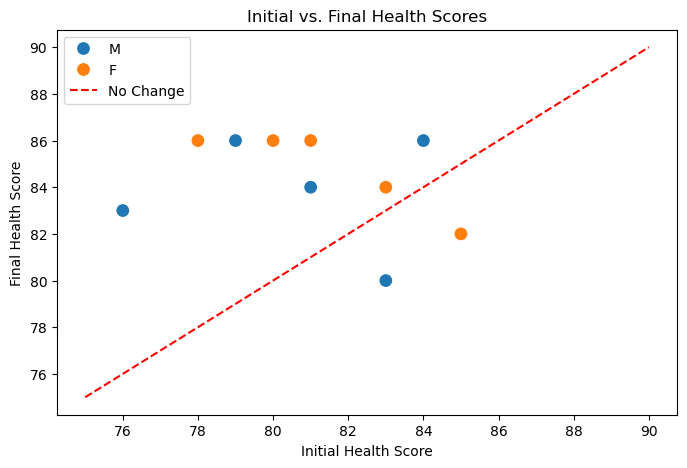

In [4]:
# Sample code for visualization (assuming matplotlib and seaborn are available)
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting initial vs. final health scores
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['InitialHealthScore'], y=df['FinalHealthScore'], hue=df['Gender'], s=100)
plt.plot([75, 90], [75, 90], color='red', linestyle='--', label='No Change')
plt.title('Initial vs. Final Health Scores')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.legend()
plt.show()


The scatterplot shows each patient's initial and final health scores. The red dashed line represents no change in health scores, and points above the line suggest an improvement in health after the vaccine.

# Summary of the report
**Problem Introduction**:  
The analysis aims to assess whether a new vaccine improves patient health by comparing health scores before and after vaccination. We use bootstrapping to determine if there is a significant effect.

**Null Hypothesis**:  
The null hypothesis (\( H_0 \)) states that the vaccine has no effect, meaning the average difference between final and initial health scores is zero. The alternative hypothesis (\( H_A \)) suggests the vaccine has an effect, meaning the average difference is not zero.

**Data Visualization**:  
A scatterplot compares initial and final health scores, with points above a reference line suggesting improvement.

**Quantitative Analysis**:  
Bootstrapping is used to generate a distribution of mean health score differences. A 95% confidence interval is calculated to test the null hypothesis.

**Methodology**:  
The analysis involves calculating the observed mean difference, resampling the data with bootstrapping, and constructing a confidence interval.

**Findings**:  
The confidence interval is used to determine whether we can reject or fail to reject the null hypothesis. If zero is included in the interval, we fail to reject; otherwise, we reject the null hypothesis.

**Conclusion**:  
The conclusion depends on whether the confidence interval excludes zero, determining if the vaccine has a significant effect or not.

**Further Considerations**:  
The small sample size, potential confounding factors, and short-term data limit the findings, and larger or longer-term studies are recommended.



# Q9

YES

# Summaries of ChatBot session of all post-lecture questions:

Here is a summarized record of our exchanges for your homework submission:

---

### Summary of Interactions:

1. **Confidence Interval & Hypothesis Testing**:
   You inquired about why a confidence interval overlapping zero means "failing to reject the null hypothesis," even when the sample mean is not zero. We discussed how a confidence interval provides a range of plausible values for a population parameter. If zero is within this range, it implies that the sample does not provide strong enough evidence to conclude that the population mean is different from zero, leading to a failure to reject the null hypothesis.

2. **Bootstrapping for Vaccine Effectiveness**:
   You provided a dataset related to a vaccine study and asked whether the vaccine is effective based on health scores before and after the treatment. We implemented bootstrapping to calculate the 95% confidence interval for the mean difference in health scores. We discussed that if the confidence interval excludes zero, the vaccine is likely effective, and the null hypothesis can be rejected.

3. **Reproducibility in Random Processes**:
   You highlighted the importance of reproducibility when using random functions. We included `np.random.seed()` in the bootstrapping analysis to ensure the results are consistent each time the analysis is run.

4. **Organizing the Report**:
   You requested help organizing your findings into a structured report. We outlined a report template that includes sections like Problem Introduction, Explanation of the Null Hypothesis, Data Visualization, Quantitative Analysis, Methodology, Supporting Visualizations, Findings, Conclusion, and Further Considerations.

5. **Summary for Submission**:
   You asked for a summary of our exchanges, and this document serves as the final record for submission, summarizing the key points from each interaction regarding confidence intervals, bootstrapping, reproducibility, and report organization.

---

This summary captures the essence of our discussions and your progress in understanding key statistical concepts for your assignment.

Link:https://chatgpt.com/share/66fcc2eb-ebac-8001-98dd-2126d2aaeb0f